In [1]:
import matplotlib.pyplot as plt
import nltk
import numpy as np

from nltk import FreqDist
from collections import Counter

%matplotlib inline

# Tokenization

It is a process of extracting tokens from the given text/document. Normally, we humans separate out the words in the text by looking if there are spaces around. But there are times when this simple scheme won't work because we know we can separate something like **"i'm"** into **"i"** and **"am"**. So, the whole idea of tokenization is to do such stuff.  

Some of the tokenization scheme might be:
- word tokenization
- sentence tokenization
- numeric tokenization (where we extract only numbers)
- datetime tokenization (where we extract only date and time)

In [2]:
text = "Hello I am paradox. I exist; therefore i may not. Existence is merely a thought process, right?"

In [3]:
# simple tokenization
words = text.split()
print(words)
frequency_map = Counter(words)

# for scatter plot
indices_max = 20 # max number of points to plot
Y = list(frequency_map.values())[:indices_max]
X = list(range(len(Y)))
words_plot = list(frequency_map.keys())[:indices_max]

['Hello', 'I', 'am', 'paradox.', 'I', 'exist;', 'therefore', 'i', 'may', 'not.', 'Existence', 'is', 'merely', 'a', 'thought', 'process,', 'right?']


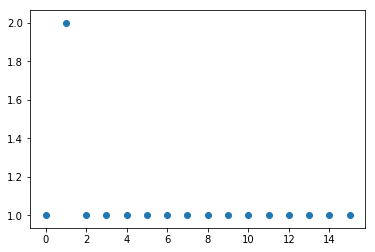

In [4]:
plt.scatter(X, Y)

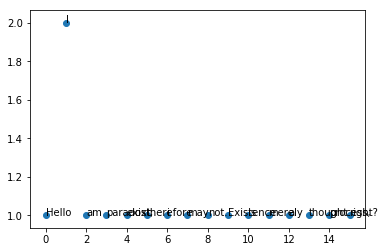

In [5]:
# scatter plot with labelled point
fig, ax = plt.subplots()
ax.scatter(X, Y)

for i, txt in enumerate(words_plot):
    ax.annotate(txt, (X[i],Y[i]))

['Hello', 'I', 'am', 'paradox', '.', 'I', 'exist', ';', 'therefore', 'i', 'may', 'not', '.', 'Existence', 'is', 'merely', 'a', 'thought', 'process', ',', 'right', '?', 'i', 'am']
2


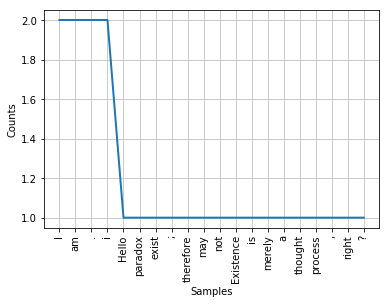

In [6]:
# nltk tokenizer and frequency map
text = "Hello I am   paradox. I exist; therefore i may not. Existence is merely a thought process, right?\ni am"
tokens = nltk.word_tokenize(text)
print(tokens)
freq = FreqDist(tokens)
print(freq['i'])
freq.plot(20, cumulative=False)

### Sentence Tokenization
This is a whole another domain(problem). A sentence has many forms and using simple splitting techniques don't do well for a large corpus. So, the task of extracting sentences from a given text/paragraph is a whole another problem. Latest setence tokenization involves various machine learning techniques like **Conditional Random Fields**, **RNN** models, etc.

In [7]:
# custom sentence tokenization
import re
sentences = re.split(r'[.?/\n]+', text)
print(sentences)

['Hello I am   paradox', ' I exist; therefore i may not', ' Existence is merely a thought process, right', 'i am']


In [8]:
# nltk sentence level tokenization
sentences = nltk.sent_tokenize(text)
print(sentences)

['Hello I am   paradox.', 'I exist; therefore i may not.', 'Existence is merely a thought process, right?', 'i am']


## Part of speech
Part of Speech, generally referred as **POS**, are words/tokens that have similar grammatical properties. Some POS tags/tokens are:
- noun
- verb
- adjective
- pronoun
- adverb
- ...
- ...

Every sentence/text can be tagged its own POS tokens since each of such tokens imply certain actions/behaviour of the sentence. So, this processing is called **POS Tagging**.

In [9]:
# nltk pos tagging
text = "My name is Paradox"
tokens = nltk.word_tokenize(text)
tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

[('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Paradox', 'NNP')]


In [10]:
nltk.help.upenn_tagset('PRP')
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('VBZ')
nltk.help.upenn_tagset('NNP')

PRP: pronoun, personal
    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


## Stemming
It is a technique for reducing a word to its root form.  

#### Example:
cats -> cat  
sitting -> sit  
exists -> exist  

This technqiue uses a naive algorithm that is based on some pre-defined rules and cutting off letters from the words.
Some raw techniques might be:  
- if 's' is present at the end, remove it
- if 'ing' is present at the end, remove it
- ...
- ...

In [11]:
from nltk.stem.porter import PorterStemmer

In [12]:
# PorterStemmer is based on Porter Stemming Algorithm
porter_stemmer = PorterStemmer()
text = "I am Paradox. Most of the time i just sit quietly here and there - contemplating and thinking about existence. i tend to have many cups of caffeine."
tokens = nltk.word_tokenize(text)
print(tokens)
stemmed = [ porter_stemmer.stem(token) for token in tokens]
print(stemmed)

['I', 'am', 'Paradox', '.', 'Most', 'of', 'the', 'time', 'i', 'just', 'sit', 'quietly', 'here', 'and', 'there', '-', 'contemplating', 'and', 'thinking', 'about', 'existence', '.', 'i', 'tend', 'to', 'have', 'many', 'cups', 'of', 'caffeine', '.']
['I', 'am', 'paradox', '.', 'most', 'of', 'the', 'time', 'i', 'just', 'sit', 'quietli', 'here', 'and', 'there', '-', 'contempl', 'and', 'think', 'about', 'exist', '.', 'i', 'tend', 'to', 'have', 'mani', 'cup', 'of', 'caffein', '.']


In [13]:
from nltk.stem.lancaster import LancasterStemmer

# it is based on Lancaster Stemming Algorithm
lancaster_stemmer = LancasterStemmer()
stemmed_lanc = list(map(lancaster_stemmer.stem, tokens))
print(stemmed_lanc)

['i', 'am', 'paradox', '.', 'most', 'of', 'the', 'tim', 'i', 'just', 'sit', 'quiet', 'her', 'and', 'ther', '-', 'contempl', 'and', 'think', 'about', 'ex', '.', 'i', 'tend', 'to', 'hav', 'many', 'cup', 'of', 'caffein', '.']


## Lemmatization
It is the process of converting the words to their morphological root (known as lemma). It normalizes the given word morpholigically.
#### Example:  
am, are, is -> be  
car, cars, car's, cars' -> car 

In [14]:
from nltk.stem import WordNetLemmatizer

In [15]:
text = "I am Paradox. Most of the time i just sit quietly here and there - contemplating and thinking about existence. i tend to have many cups of caffeine."
tokens = nltk.word_tokenize(text)
wordnet_lemmatizer = WordNetLemmatizer()
lemmas = [ wordnet_lemmatizer.lemmatize(token, pos='v') for token in tokens ]
print(lemmas)

['I', 'be', 'Paradox', '.', 'Most', 'of', 'the', 'time', 'i', 'just', 'sit', 'quietly', 'here', 'and', 'there', '-', 'contemplate', 'and', 'think', 'about', 'existence', '.', 'i', 'tend', 'to', 'have', 'many', 'cup', 'of', 'caffeine', '.']


### Note
Stemming and Lemmatization are not the same thing. 

In [16]:
words = ['operation', 'operating', 'operational', 'abandonment', 'is', 'are']
stems = list(map(porter_stemmer.stem, words))
lemmas = [ wordnet_lemmatizer.lemmatize(word, pos='v') for word in words ]
print(stems)
print(lemmas)

['oper', 'oper', 'oper', 'abandon', 'is', 'are']
['operation', 'operate', 'operational', 'abandonment', 'be', 'be']
